**Рекомендации по планированию на 2017 год:**

При планировании на 2017 год следует учесть, что для Североамериканского и Европейского региона популярны игры маркировки E, M, T, жанра Shooter, и выпущенные для платформы PS4. Для Японского сектора характернее в основном "детские" игры жанра RPG, выпущенные для платформы 3DS.

Следует обращать внимание на отзывы критиков, а возможно и оплатить "рекламные отзывы" популярных критиков. Отзывы пользователей существенного влияния на продажи не оказывают.

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных:**

Name — название игр

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг 
компьютерных игр и присваивает им подходящую возрастную категорию.

##  Подготовка данных к работе 


In [2]:
# импортируем нужные в работе библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

# отобразим все колонки таблицы 
pd.set_option('display.max_columns', None)

In [3]:
# считываем файл посмотрим первые строки
df = pd.read_csv('/datasets/games.csv')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# проверка на явные дубликаты
df.duplicated().sum()

0

In [6]:
# смотрим информацию о типах данных и пропусках
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Переименование столбцов

Помимо пропусков видим, что названия столбцов в не самом удобном формате, приведем их к нижнему регистру:

In [7]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Замена типов данных

Далее видим, что в некоторых столбцах необходимо заменить тип данных.  В столбце year_of_release с float на int, так как номер года целочисленен, user_score с object на float так как в этом столбце явно используются вещественные числа от 0 до 10:

In [8]:
df.year_of_release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [9]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
# меняем тип данных в year_of_release
df['year_of_release'] = df['year_of_release'].astype(pd.Int64Dtype())

В столбце user_score есть также значение tbd. Что означает "To Be Determined" (будет определено) или "To Be Decided" (будет решено) и используется, когда информация еще не была получена. 

Полагаю, что значения tbd можно заменить на nan и после этого поменять тип столбца:

In [11]:
# меняем 'tbd' на nan
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

# преобразуем тип данных
df['user_score'] = df['user_score'].astype('float64',  errors='ignore')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Работа с пропусками


In [13]:
# суммируем пропуски
df.isna().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
rating             6766
critic_score       8578
user_score         9125
dtype: int64

In [14]:
# посмотрим сколько пропусков в процентном соотношении к общему количеству
df.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('GnBu')

,0
platform,0.00%
na_sales,0.00%
eu_sales,0.00%
jp_sales,0.00%
other_sales,0.00%
name,0.01%
genre,0.01%
year_of_release,1.61%
rating,40.48%
critic_score,51.32%


Начнем с пропусков в столбцах 'name' и 'genre', их всего по два:

In [15]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [16]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две строки с пропущенными значениями в 'name' и 'genre' одинаковы и также имеют пропуски  в рейтинге и оценках юзеров и критиков. 

Так как заполнить пропуски невозможно и строк всего две, принимаю решение их просто удалить.

In [17]:
df = df.dropna(subset = ['name', 'genre'] )

Далее смотрим на пропуски в year_of_release:

In [18]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В некоторых названиях присутствует год, однако он может не быть годом релиза и пропусков всего 1.6%, кроме того, в некоторых строках, где не проставлен год релиза, также отсутствуют сведения в других столбцах. Поэтому полагаю, что пропуски  можно удалить, при дальнейшей фильтрации эти сведения всё равно уйдут.

In [19]:
df = df.dropna(subset = ['year_of_release'] )

Далее рассмотрим пропуски в столбце rating: 

In [20]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [21]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Класс рейтинга игры определяется по многим показателям, так что самостоятельно заполнить не видится возможным. Так как рейтинг выставлен по системе ESRB, преполагаю просто преобразовать nan в 'RP', как Rating Pending — «Рейтинг ожидается»(такая категория в ESRB есть). Скорее всего эти пропуски результат  тех ошибки при заполнении, а еще может быть что для разных стран рейтинг этих игр различается и поэтому предпочли оставить nan.

In [22]:
df.loc[df.rating.isna(), 'rating'] = 'RP'

Также в рейтинге ESRB у нас в датасете встречается маркировка "К-А", которая была заменена на "Е" в 1998 году.  Для удобства работы, предлагаю заменить "К-А" на "Е":

In [23]:
df.rating = df.rating.replace('K-A','E')

In [24]:
df.rating.unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

Самые обширные пропуски в колонках critic_score - 51.31% и user_score - 54.59%.  Видимо на эти игры пользователи не хотели ставить оценки или их очень мало.  По оценкам критиков, наверняка можно было бы поискать какие-то данные и заполнить из них, но у нас нет доступа к такой информации и неизвестно рейтинг какого сайта или фирмы использован в этом датасете. Поэтому пропуски решено заменить на -1, как на некоторое асбурдное значение, так как в этих столбцах только неотрицательные значения.

In [25]:
df['user_score'] = df.user_score.fillna(-1)
df['critic_score'] = df.critic_score.fillna(-1)

Проверим на пропуски теперь:

In [26]:
df.isna().sum().sort_values()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Обогащение датасета

Для дальнейшей работы создаём столбец, содержащий суммарные продажи по всем регионам.

In [27]:
df['all_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,RP,31.38


Для удобства восприятия расположим столбцы в удобном порядке:

In [28]:
df = df.reindex(columns=['name', 'platform', 'year_of_release', 'genre', \
                         'all_sales', 'na_sales', 'eu_sales', 'jp_sales', \
                         'other_sales', 'critic_score', 'user_score', 'rating'])

In [29]:
df.head()

,name,platform,year_of_release,genre,all_sales,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,82.54,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,40.24,29.08,3.58,6.81,0.77,-1.0,-1.0,RP
2,Mario Kart Wii,Wii,2008,Racing,35.52,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,31.38,11.27,8.89,10.22,1.00,-1.0,-1.0,RP


### Выводы


В наших данных были пропуски в разных столбцах:

Две строки с пропусками в 'name' и ''genre' было решено удалить, в виду невозможности восполнить сведения и малому количеству пропусков. 

В столбце 'year_of_release' было решено  удалить пропуски,их всего 1.6%, строки с пропусками в годе релиза иногда содержат пропуски и в лругих колонках, да и в далнейшем, при фильтрации датасета, эти пропуски всё равно уйдут. 

В столбце 'rating' было организавно новое значение 'RP', как Rating Pending — «Рейтинг ожидается»(такая категория в ESRB есть). Скорее всего эти пропуски результат  тех ошибкти при заполнении, а еще может быть что для разных стран рейтинг этих игр различается и поэтому препочли оставить nan.

В столбцах 'user_score' и 'critic_score' пропуски были заменены на -1, так как заполнить не видится возможным.

Рейтинг "К-А" был заменен на "Е" в 1998 году, так что,для удобства, была произведена замена и в нашем датасете.

Дубликатов в датафрейме не обнаружено.

Названия столбцов были приведены к нижнему регистру.

Датасет был обогащен сведениями по продажам со всего мира.

У столбцов year_of_release и user_score был изменен тип данных на более соответствующий. 

In [30]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   all_sales        16444 non-null  float64
 5   na_sales         16444 non-null  float64
 6   eu_sales         16444 non-null  float64
 7   jp_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   critic_score     16444 non-null  float64
 10  user_score       16444 non-null  float64
 11  rating           16444 non-null  object 
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ данных

В рамках исследовательского анализа данных произведём анализ данных по следующим показателям:

- Количество игр по году выпуска. Посмотрим важны ли эти данные за все периоды.

- Уровень продаж по игровым платформам. Оценим есть ли характерный срок иссчезновения старых платформ и появления новых.

- Определим актуальный период, данные в котором помогут построить прогноз на 2017 год;

- Выберем несколько потенциально прибыльных платформ. Посмотрим влияют ли на на продажи внутри одной популярной платформы отзывы пользователей и критиков. Соотнесём выводы с продажами игр на других платформах.

- Посмотрим на общее распределение игр по жанрам. Оценим самые прибыльные жанры и посмотрим выделяются ли чем-то самые прибыльные и самые не прибыльные жанры.

### Сколько игр выпускалось в разные годы

In [31]:
pivot_years = df.pivot_table \
                (index='year_of_release', values='name', aggfunc='count') \
                .sort_values('year_of_release', ascending=False
                     )

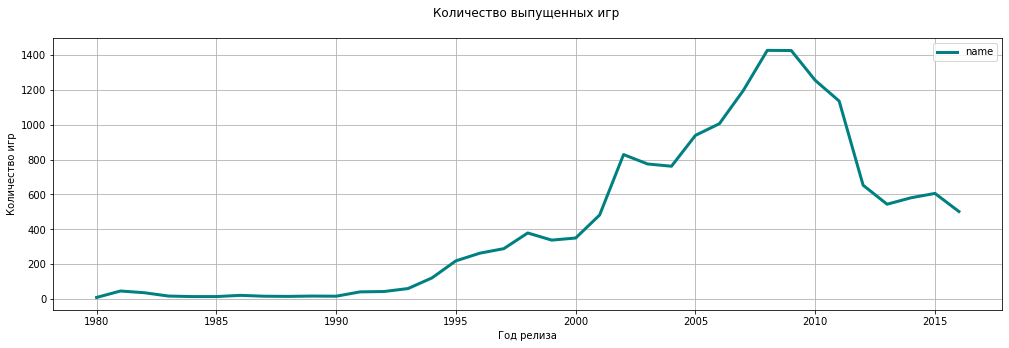

In [32]:
pivot_years.plot  \
            (figsize=(17,5), \
             grid=True, linewidth=3, \
             title='Количество выпущенных игр \n',color = 'teal',
             xlabel='Год релиза' ,ylabel='Количество игр'
                );

Видим, как с 2000-ого года резко увеличивается количество игр, хотя плавный рост налюдается примерно с 90-ых.  Самые первые видеогры начинают появляться только в 40-ых, а в нашем датасете самые поздние игры из 80-ых годов. 

In [33]:
df.query("year_of_release >= 1940 and year_of_release <= 1980")

,name,platform,year_of_release,genre,all_sales,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
262,Asteroids,2600,1980,Shooter,4.31,4.00,0.26,0.0,0.05,-1.0,-1.0,RP
546,Missile Command,2600,1980,Shooter,2.76,2.56,0.17,0.0,0.03,-1.0,-1.0,RP
1764,Kaboom!,2600,1980,Misc,1.15,1.07,0.07,0.0,0.01,-1.0,-1.0,RP
1968,Defender,2600,1980,Misc,1.05,0.99,0.05,0.0,0.01,-1.0,-1.0,RP
2650,Boxing,2600,1980,Fighting,0.77,0.72,0.04,0.0,0.01,-1.0,-1.0,RP
4019,Ice Hockey,2600,1980,Sports,0.50,0.46,0.03,0.0,0.01,-1.0,-1.0,RP
5360,Freeway,2600,1980,Action,0.34,0.32,0.02,0.0,0.00,-1.0,-1.0,RP
6300,Bridge,2600,1980,Misc,0.27,0.25,0.02,0.0,0.00,-1.0,-1.0,RP
6875,Checkers,2600,1980,Misc,0.23,0.22,0.01,0.0,0.00,-1.0,-1.0,RP


Полагаю, что важнее всего рассмотреть игры 21 века, как наиболее актуальные.  Большинство игр до этого момента уже считаются безнадежно устаревшими и только единицы из них по-прежнему пользуются популярностью. После 2009 года наблюдаеся сплавный спалд в количестве производимых игр, очевидно, что со временем начинают стараться делать качественнее, но меньше, так как разработка игры очень ресурсозатратна, а основная задача разработчика-это заработать на продаже игры. А так же, начиная с поздних 90-ых, начинают выходить массовые онлайн игры (такие как Lineage,  Starcraft, Counter-Strike, World of Warcraft), к которым только выходят разные сезонные обновления, не являющиеся отдельными играми. Множество таких игр как раз обрело популярность после 2010 года (например, League of Legends и Dota 2). 

### Как менялись продажи по платформам с течением времени

Сначала посмотрим самые популярные платформы по всем продажам:

In [34]:
platform_sales = df.pivot_table \
                    (index='platform',values='all_sales', aggfunc='sum') \
                    .sort_values('all_sales', ascending=False)               

Построим наглядный график по этим данным:

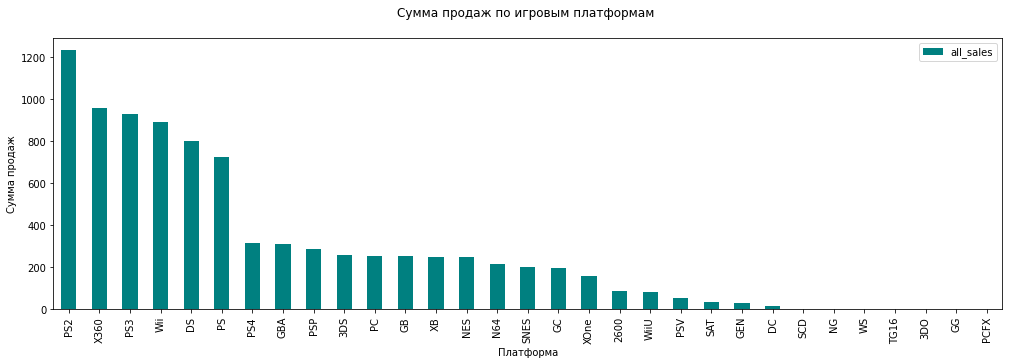

In [35]:
platform_sales.plot \
               (kind='bar',title='Сумма продаж по игровым платформам \n', \
                figsize=(17, 5), color = 'teal')\
               .set(xlabel='Платформа', ylabel='Сумма продаж'
                    );

Посмотрим на топ-10 платформ по продажам:

In [36]:
platform_sales.head(10)

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Явно видно, что есть шестёрка лидеров продаж. Далее оценим среднюю продолжительноть "жизни" платформ:

In [37]:
platform_life = df.pivot_table \
                  (index='year_of_release', columns='platform', values='all_sales',aggfunc='sum') \
                  .notna() \
                  .sum()

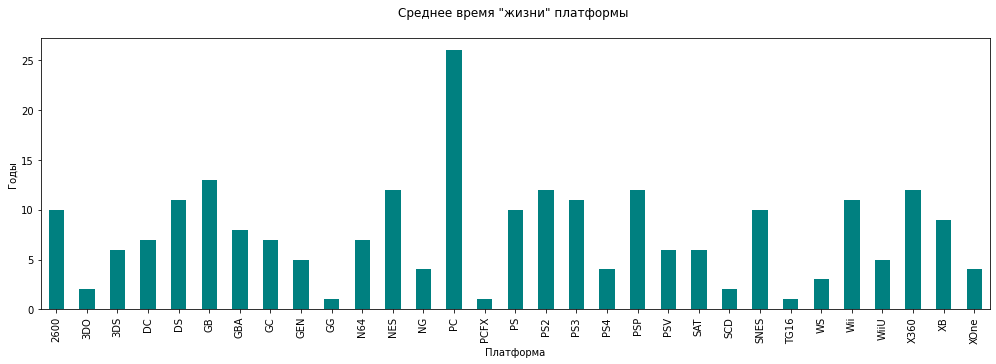

In [38]:
platform_life.plot \
             (kind='bar',title='Среднее время "жизни" платформы \n', figsize=(17, 5), color = 'teal')\
             .set(xlabel='Платформа', ylabel='Годы');

In [39]:
platform_life.describe()

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
dtype: float64

Видим, что, в среднем, платформа живет 7-8 лет.  При этом есть одна платформа, которая актуальна всё время, это конечно же PC. 

### Данные для прогноза

Так как средний срок жизни платформы составляет 7-8 лет, то, для прогнозирования данных на 2017-ый год, возьмем данные за половину срока жизни платформы (2013-2016) и далее будем работать с уже отфильтрованным датасетом. Это позволит нам работать с наиболее актуальными на  2016 год платформами:

In [40]:
df_new = df.query('2013 <= year_of_release <= 2016')
df_new.head()

,name,platform,year_of_release,genre,all_sales,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,21.05,7.02,9.09,0.98,3.96,97.0,8.2,M
23,Grand Theft Auto V,X360,2013,Action,16.27,9.66,5.14,0.06,1.41,97.0,8.1,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,14.63,6.03,5.86,0.36,2.38,-1.0,-1.0,RP
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,14.60,5.28,4.19,4.35,0.78,-1.0,-1.0,RP
42,Grand Theft Auto V,PS4,2014,Action,12.62,3.96,6.31,0.38,1.97,97.0,8.3,M


### Анализ платформ

#### По продажам

Оценим продажи по платформам в нашем новом датасете и сразу посмотрим топ-10:

In [41]:
df_new.pivot_table \
       (index='platform', values='all_sales', aggfunc='sum').nlargest(10, 'all_sales') \
       .reset_index()

,platform,all_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


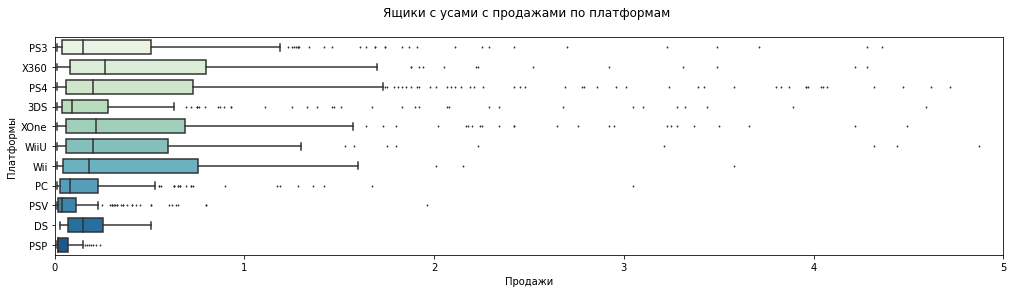

In [42]:
fig, ax = plt.subplots(figsize=(17,4))

sns.boxplot\
    (data=df_new,
     x='all_sales', y='platform', \
     width=0.7, \
     fliersize=1, \
     ax=ax, \
     palette='GnBu') \
    .set(xlabel='Продажи', ylabel='Платформы', title='Ящики с усами с продажами по платформам \n')

plt.xlim([0,5]) ;

Здесь мы видим, что на первом месте PS4, которая как раз появилась в 2013-ом году и является наиболее актуальной.  На втором месте ее боле ранняя версия PS3, для которой еще продолжают выпускать игры. Третье место отошло Xone, которая тоже была релизнута в 2013-ом году, но не стала такой популярной, как PS4. По медиане боксплотов на первом месте Х360, но эта платформа вышла в 2005 году, так что на момент 16-ого года ее популярность будет снижаться. Тем более, что в 2013 вышла Xone, которая является следующим поколением приставок от Майкрософт.

#### По влиянию на продажи отзывов

Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для этого возьмем платформу PS4, как наиболее прибыльную в нашем отфильтрованном датасете:

In [44]:
# создадим выборки с оценками юзеров и критиков по одной платформе
ps4_user = df_new.query('(platform == "PS4") and (user_score >-1)')
ps4_critic = df_new.query('(platform == "PS4") and (critic_score >-1)')

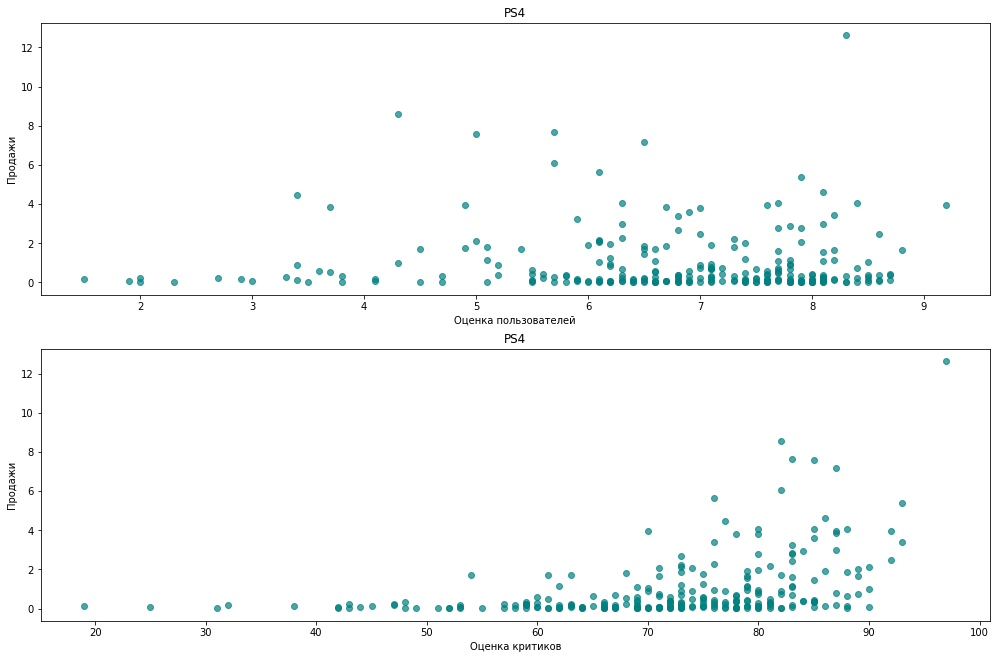

Корреляция продаж с оценкой пользователей составляет: -0.03
Корреляция продаж с оценкой критиков составляет: 0.41


In [46]:
fig, ax = plt.subplots(2, figsize=(17, 11))

ax[0].scatter(x = ps4_user.user_score, y = ps4_user.all_sales, c='teal', alpha=0.7)
ax[0].set_xlabel('Оценка пользователей')
ax[0].set_ylabel('Продажи')
ax[0].set_title('PS4')

ax[1].scatter(x = ps4_critic.critic_score, y = ps4_critic.all_sales, c='teal', alpha=0.7)
ax[1].set_xlabel('Оценка критиков')
ax[1].set_ylabel('Продажи')
ax[1].set_title('PS4')

plt.show() 

# Комментарий ревьюера 2
#print (f'Корреляция продаж с оценкой пользователей составляет: {round(ps4.user_score.corr(ps4.all_sales),2)}')
#print (f'Корреляция продаж с оценкой критиков составляет: {round(ps4.critic_score.corr(ps4.all_sales),2)}')

print (f'Корреляция продаж с оценкой пользователей составляет: {round(ps4_user.user_score.corr(ps4_user.all_sales),2)}')
print (f'Корреляция продаж с оценкой критиков составляет: {round(ps4_critic.critic_score.corr(ps4_critic.all_sales),2)}')

Как мы видим,  продажи игр не коррелируют с оценками пользователей, зато положительная корреляция есть с оценками критиков. Всё-таки довольно часто перед покупкой игры, на нее смотрят обзоры и рейтинги популярный агенств и журналов.  А оценки пользователей могут быть ситуативными(когда у человека случился разовый баг и он мог поставить "1" или наоборот ему нравится графика в игре и он оценил игру на "10", а вот  многим пользовтелям важнее геймплей и они могут оценить эту же игру на "3").  А критики всё-таки подходят более комплексно к оценке игры и стараются избегать приплетания излишне личного мнения в такой оценке. Хотя существуют и проплаченные фейковые отзывы "критиков" для увеличения продаж. Как мы видим из корреляции,это не самая плохая стратегия повышения прибыльности. 

Далее рассмотрим корреляции на других платформах:

Корреляция продаж на PS3 с оценкой пользователей составляет: 0.0
Корреляция продаж на XOne с оценкой пользователей составляет: -0.07
Корреляция продаж на 3DS с оценкой пользователей составляет: 0.24
Корреляция продаж на X360 с оценкой пользователей составляет: -0.01


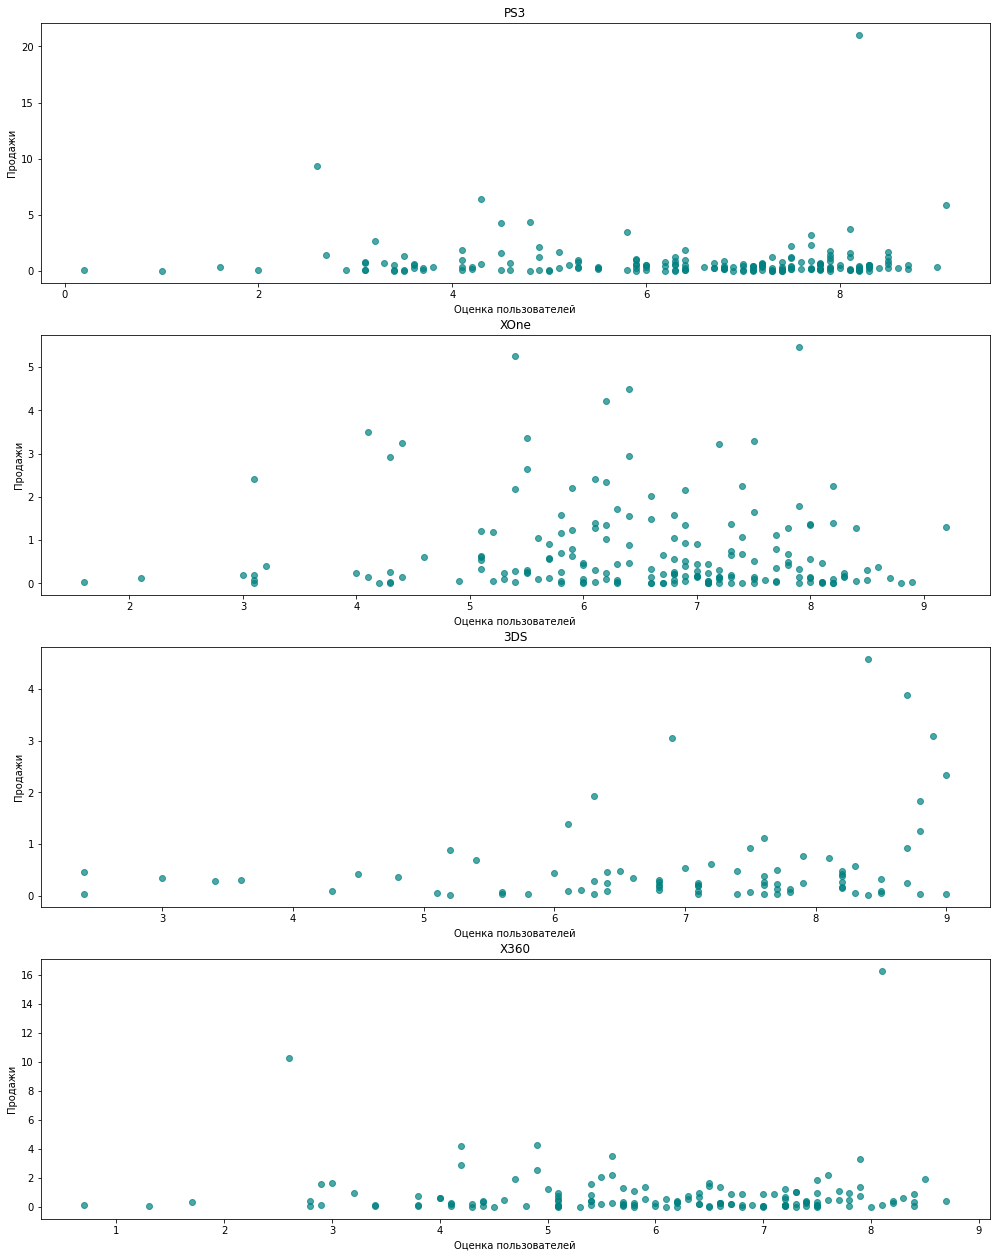

In [47]:
# возьмем список платформ из наших оставшихся из топ-5
platforms = ['PS3', 'XOne','3DS','X360']
n = 0
fig, ax = plt.subplots(4, figsize=(17, 22))

for p in platforms:
    platform = df_new.query('(platform == @p) and (user_score >-1)')
    
    ax[n].scatter(x = platform.user_score, y = platform.all_sales, c='teal', alpha=0.7)
    ax[n].set_xlabel('Оценка пользователей')
    ax[n].set_ylabel('Продажи')
    ax[n].set_title(p)
    
    print (f'Корреляция продаж на {p} с оценкой пользователей составляет: {round(platform.user_score.corr(platform.all_sales),2)}')
    n +=1
plt.show()

Корреляция продаж на PS3 с оценкой критиков составляет: 0.33
Корреляция продаж на XOne с оценкой критиков составляет: 0.42
Корреляция продаж на 3DS с оценкой критиков составляет: 0.36
Корреляция продаж на X360 с оценкой критиков составляет: 0.35


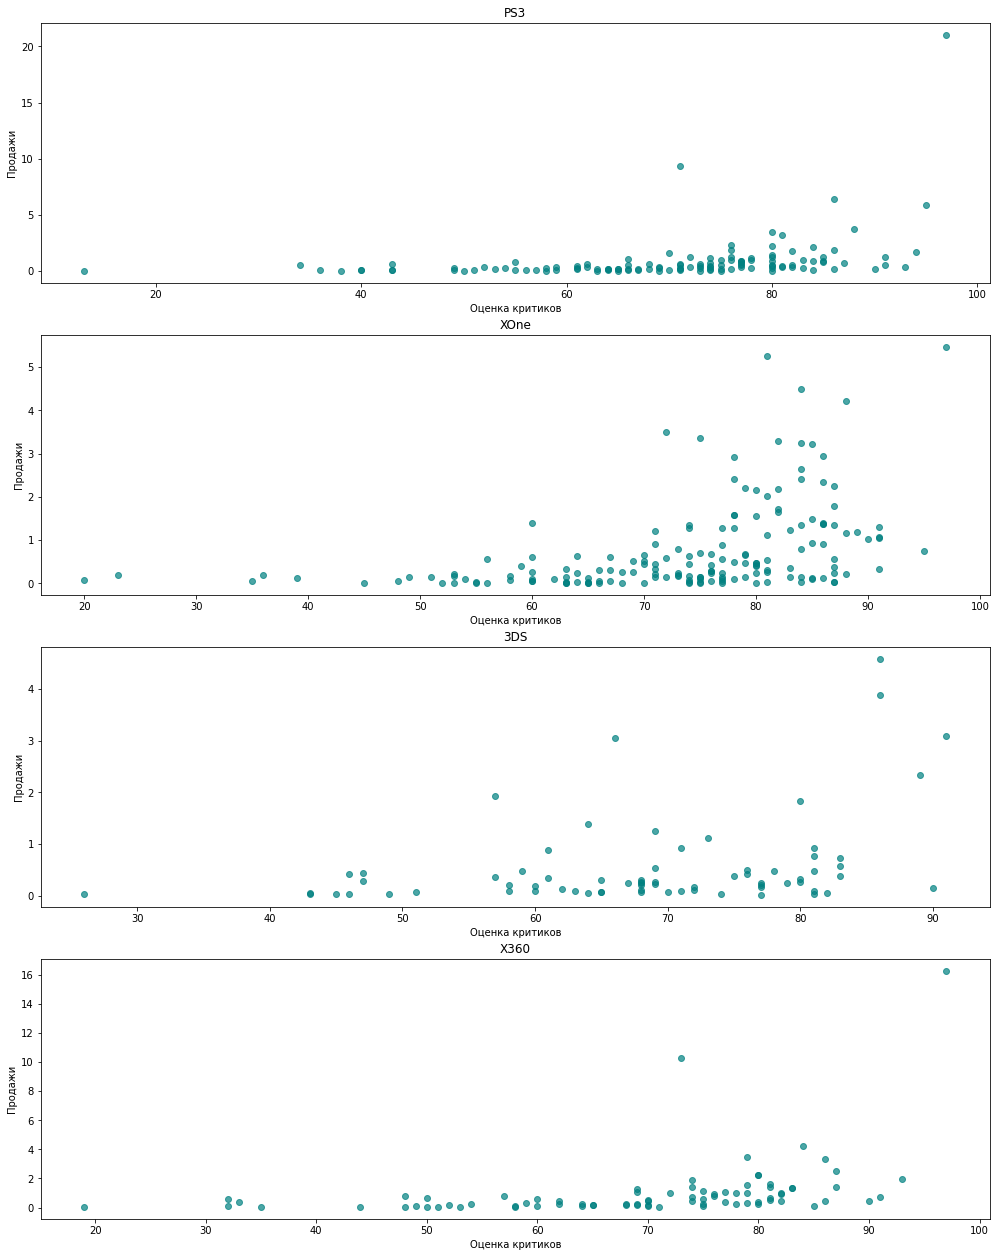

In [48]:
# сделаем тоже самое для оценок критиков
platforms = ['PS3', 'XOne','3DS','X360']
n = 0
fig, ax = plt.subplots(4, figsize=(17, 22))

for p in platforms:
   
    platform = df_new.query('(platform == @p)  and (critic_score >-1)')

    ax[n].scatter(x = platform.critic_score, y = platform.all_sales, c='teal', alpha=0.7)
    ax[n].set_xlabel('Оценка критиков')
    ax[n].set_ylabel('Продажи')
    ax[n].set_title(p)
     
    print (f'Корреляция продаж на {p} с оценкой критиков составляет: {round(platform.critic_score.corr(platform.all_sales),2)}')
    n +=1
plt.show()       

Как мы видим, на других платформах корреляции с отзывами критиков и пользователей примерно такие же, как и на PS4.

### Анализ жанров игр

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Построим диаграммы размаха для оценки прибыльности:

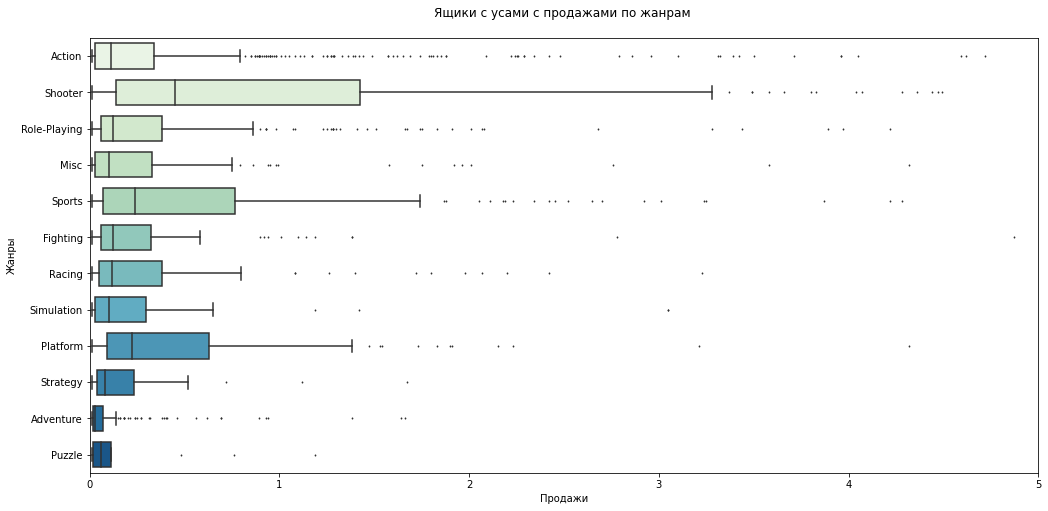

In [50]:
fig, ax = plt.subplots(figsize=(17,8))

sns.boxplot\
    (data=df_new,
     x='all_sales', y='genre', \
     width=0.7, \
     fliersize=1, \
     ax=ax, \
     palette='GnBu') \
    .set(xlabel='Продажи', ylabel='Жанры',title='Ящики с усами с продажами по жанрам \n')
plt.xlim([0,5]) ;

Также можно оценить самые прибыльные игры и какой у них был жанр:

In [51]:
top_game_genre = (df_new.pivot_table \
                  (index=['name','genre'], values='all_sales', aggfunc='sum') \
                  .sort_values('all_sales', ascending=False) \
                  .reset_index()
                   )
top_game_genre.head()

,name,genre,all_sales
0,Grand Theft Auto V,Action,56.58
1,Call of Duty: Ghosts,Shooter,27.39
2,Call of Duty: Black Ops 3,Shooter,25.67
3,Minecraft,Misc,24.16
4,Call of Duty: Advanced Warfare,Shooter,21.97


Как мы видим самые популярный жанр игр это  Shooter. При этом топе-5 самых популярных игр  целых три места в топе занимают игры этого жанра. На втором месте игры жанра Sport, а на третьем Platform.
Самыми непопулярными являются игры жанра Puzzle.  Кто будет собирать паззлы, если есть множество интереснейших игр, а паззл можно пособирать в телефоне, в мобильной игрушке. Так же непопулярными выявлены игры жанров Simulation и Strategy, жанры, в которых нужно думать. Полагаю, что это потому, что многие играют в компьютерные игры, чтобы просто раслабиться, пообщаться и отдохнуть. 

### Выводы



В среднем, платформы живут 7-8 лет, далее они сильно теряют в своей актуальности. За период 2013-2016 гг. самые популярные платформы это  PS4, PS3 и Xone.

Отзывы пользователей неоказывают влияния на продажи, а вот отзывы критиков влияют. 

Самые популярные игры жанра Shooter, Sports и Platform, а самые непопулярные это Puzzle, Simulation и Strategy.

## Портрет пользователя каждого региона

В рамках этой части проекта перед нами соят следующие задачи:

 - Выбрать самые популярные платформы по регионам (топ-5).

 - Определить самые популярные жанры по регионам (топ-5).

 - Выяснить влияет ли рейтинг ESRB на продажи в отдельном регионе
 
 - Определить "портрет" для пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы

Определим топ-5 популярных платформ для каждого региона:

In [52]:
df_new.head()

,name,platform,year_of_release,genre,all_sales,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,21.05,7.02,9.09,0.98,3.96,97.0,8.2,M
23,Grand Theft Auto V,X360,2013,Action,16.27,9.66,5.14,0.06,1.41,97.0,8.1,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,14.63,6.03,5.86,0.36,2.38,-1.0,-1.0,RP
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,14.60,5.28,4.19,4.35,0.78,-1.0,-1.0,RP
42,Grand Theft Auto V,PS4,2014,Action,12.62,3.96,6.31,0.38,1.97,97.0,8.3,M


In [53]:
# топ-5 платформ по продажам в Северной Америке
na = (df_new.pivot_table \
            (index=['platform'], values='na_sales', aggfunc='sum') \
            .sort_values('na_sales', ascending=False) \
            .reset_index()
            )
na.head()

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


In [54]:
# топ-5 платформ по продажам в Европе
eu = (df_new.pivot_table \
            (index=['platform'], values='eu_sales', aggfunc='sum') \
            .sort_values('eu_sales', ascending=False) \
            .reset_index()
            )
eu.head()

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


In [55]:
# топ-5 платформ по продажам в Японии
jp = (df_new.pivot_table \
            (index=['platform'], values='jp_sales', aggfunc='sum') \
            .sort_values('jp_sales', ascending=False) \
            .reset_index()
            )
jp.head()

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


Создадим пайчарты для наглядности:

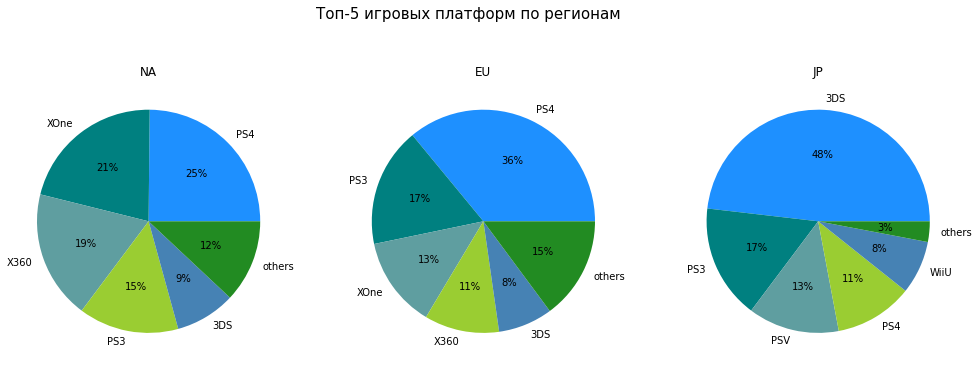

In [56]:
colors = ['dodgerblue','teal','cadetblue','yellowgreen', 'steelblue','forestgreen']
regions=['na_sales','eu_sales', 'jp_sales']
fig, ax = plt.subplots(1,3, figsize=(17, 10))
n = 0

for r in regions:
    # отфильтруем датасет
    platform = (df_new.pivot_table \
                    (index='platform', values=r , aggfunc='sum') \
                    .sort_values( r, ascending = False) \
                    .reset_index())
    # выберем топ-5 
    best = platform[:5].copy()

    # остальные объединим в категорию 'others'
    new_row = pd.DataFrame(data = {
    'platform' : ['others'],
        r : [platform[r][5:].sum()]
      })

    # соединяем вместе
    platform_combo = pd.concat([best, new_row])
    
    # строим пайчарт
    platform_combo.plot \
        (kind='pie',y=r,ax=ax[n], autopct='%1.0f%%', \
         legend=False,labels= platform_combo.platform, \
        colors=colors)\
        .set_ylabel('') 
    
    n+=1
fig.suptitle('Топ-5 игровых платформ по регионам',
             y = 0.8,
             fontsize = 15)
ax[0].set_title("NA")
ax[1].set_title("EU")
ax[2].set_title("JP")

plt.show()

Видим явные различия в популярности платформ, например PS4, занимающая первое место по продажам в Северной Америке и Европе, занимает в Японии только 4-ое место.  А на первом месте в японском секторе 3DS, которая в остальных регионах только пятая.  Смешанная категория из разных платформ, не вошедших в топ-5 показывает, что в Японии такое разнообразие не очень-то популярно(всего 3%), в то время как в Северной Америке и Европе любят разнообразие в выборе игровой платформы.

### Самые популярные жанры

Дальше оценим самые популярные жанры игр по регионам:

In [57]:
# топ-5 жанров игр в Северной Америке
na_genres = (df_new.pivot_table \
                    (index='genre', values='na_sales', aggfunc='sum') \
                    .sort_values('na_sales', ascending=False) \
                    .reset_index()
                        )
na_genres.head()

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


In [58]:
# топ-5 жанров игр в Европе
eu_genres = (df_new.pivot_table \
                    (index='genre', values='eu_sales', aggfunc='sum') \
                    .sort_values('eu_sales', ascending=False) \
                    .reset_index()
                        )
eu_genres.head()

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


In [59]:
# топ-5 жанров игр в Японии
jp_genres = (df_new.pivot_table \
                    (index='genre', values='jp_sales', aggfunc='sum') \
                    .sort_values('jp_sales', ascending=False) \
                    .reset_index()
                        )
jp_genres.head()

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


Также создадим для наглядности пайчарты:

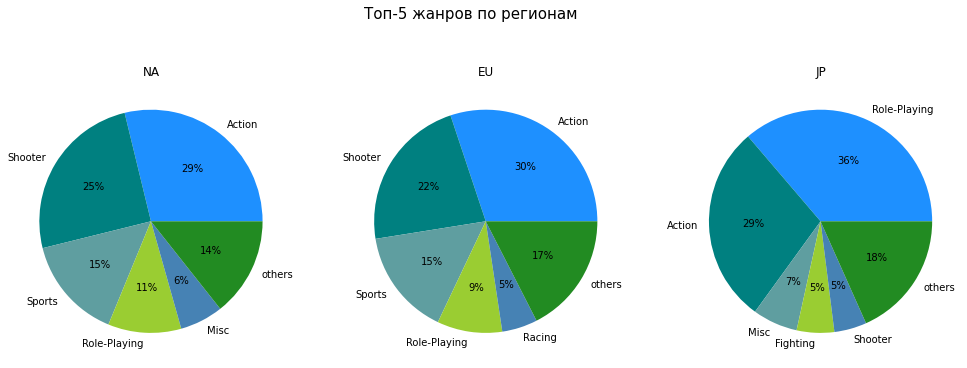

In [60]:
regions=['na_sales','eu_sales', 'jp_sales']
fig, ax = plt.subplots(1,3, figsize=(17, 10))
n = 0

for r in regions:
    # отфильтруем датасет
    genres = (df_new.pivot_table \
                    (index='genre', values=r , aggfunc='sum') \
                    .sort_values( r, ascending = False) \
                    .reset_index())
    # выберем топ-5
    best = genres[:5].copy()

    # остальные объединим в категорию 'others'
    new_row = pd.DataFrame(data = {
    'genre' : ['others'],
        r : [genres[r][5:].sum()]
      })

    # соединияем вместе
    genres_combo = pd.concat([best, new_row])
    
    
    # строим пайчарт
    genres_combo.plot \
        (kind='pie',y=r,ax=ax[n], autopct='%1.0f%%', \
         legend=False,labels= genres_combo.genre, \
        colors=colors)\
        .set_ylabel('') 
    
    n+=1
    
fig.suptitle('Топ-5 жанров по регионам', y = 0.8, fontsize = 15)
ax[0].set_title("NA")
ax[1].set_title("EU")
ax[2].set_title("JP")

plt.show()  

И снова отличается Япония. У Северной америки и Европы совпадают первые 4 места по популярности жанров и только пятое различается, а вот в Японии самый популярный для других регионов жанр Action был смещен на второе место жанром Role-Playing. Скорее всего это связано с огромной популярностью в Японии разных азиатских РПГ.  Шутеры вообще в японском топе занимают только пятое место, в то время как в других регионах это второе место.  Также на графиках видно, какой большой сегмент занимают игры категории 'others', куда вошли игры жанров, не вошедших в топ-5 по региону.  Видимо у каждого жанра всё-таки есть свой потребитель и, хоть по отдельности их немного, в сумме они составляют внушительый кусок рынка игр. 

### Влияние рейтина ESRB на продажи игр

**ESRB имеет следующие маркировки рейтингов:**

«EC» («Early childhood») — «Для детей младшего возраста», 3+

«E» («Everyone») — «Для всех», 6+

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше», 10+

«T» («Teen») — «Подросткам», 13+

«M» («Mature») — «Для взрослых», 17+

«AO» («Adults Only 18+») — «Только для взрослых», 18+

«RP» («Rating Pending») — «Рейтинг ожидается»

«RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»

Рассмотрим, оказывают ли рейтинги влияние на продажи игр. Посмотрим на топ-5 рейтингов по регионам:

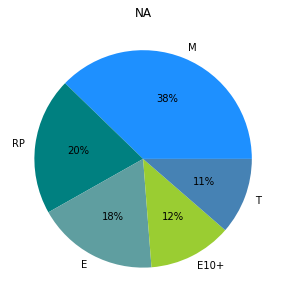

In [62]:
colors = ['dodgerblue','teal','cadetblue','yellowgreen', 'steelblue']

esrb_na = df_new.pivot_table \
             (index='rating', values='na_sales', aggfunc='sum') \
             .nlargest(5, 'na_sales') \
             .reset_index() \
             .sort_values('na_sales', ascending=False)
esrb_na.plot \
        (kind='pie', y='na_sales',autopct='%1.0f%%', \
        figsize=(10, 5), legend=False,labels=esrb_na.rating, \
        colors=colors, title='NA') \
        .set_ylabel('')
             

plt.show()


In [63]:
esrb_na

,rating,na_sales
0,M,165.21
1,RP,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


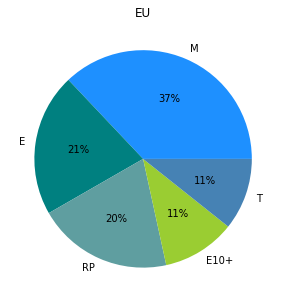

In [71]:
esrb_eu = df_new.pivot_table \
            (index='rating', values='eu_sales', aggfunc='sum') \
            .nlargest(5, 'eu_sales') \
            .reset_index() \
            .sort_values('eu_sales', ascending=False)
esrb_eu.plot \
        (kind='pie', y='eu_sales',autopct='%1.0f%%', \
         figsize=(10, 5), legend=False,labels=esrb_eu.rating, \
         colors=colors, title='EU') \
        .set_ylabel('')

plt.show()


In [65]:
esrb_eu

,rating,eu_sales
0,E,704.14
1,RP,609.68
2,M,480.00
3,T,421.79
4,E10+,183.35


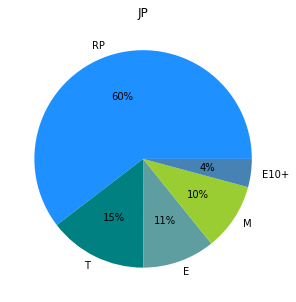

In [72]:
esrb_jp = df_new.pivot_table \
            (index='rating', values='jp_sales', aggfunc='sum') \
            .nlargest(5, 'jp_sales') \
            .reset_index() \
            .sort_values('jp_sales', ascending=False)
esrb_jp.plot \
        (kind='pie', y='jp_sales',autopct='%1.0f%%', \
         figsize=(10, 5), legend=False,labels=esrb_jp.rating, \
         colors=colors, title='JP') \
        .set_ylabel('')

plt.show()

In [67]:
esrb_jp 

,rating,jp_sales
0,RP,836.74
1,E,199.42
2,T,150.70
3,M,63.58
4,E10+,40.20


Как мы видим, у многих игр не проставлены рейтинги, это из-за того, что рейтинг ESRB сощдан для североамериканского региона. У других регионов свои рейтинги. Получается, что, если не проставлен рейтинг,значит игра была выпущена не в Североамериканском регионе. Тем не менее, мы видим, что Европа и Северная Америка опять практически дублируют друг дргуа и самыми популярными категориями являются категории для всех (6+) для подростков (13+) и для взрослых (17+). А вот в Япоснком сегменте только 5% ушло на взрослый сегмент и в основном продажи идут в секторе игр для всех (6+) и подростки (13+). Возможно в Японии предпочитают менее жестокие и более детские игры.

### Выводы

Стандартный геймер в Севрной америке препочитает подростоковые игры, игры для взрослых или игры 6+, любит жанры экшн, шутер и спорт и предпочитает играть на PS4,XOne или на X360. Европейский геймер любит те же жанры и возрастные рейтинги в играх, однако играть предпочитает на PS4, PS3 или XOne. В Японии препочтение отдают более "детским" по рейтингам играм, жанра РПГ, экшн и смешанному жанру. Играть предпочитают на 3DS, PS3	или PSV.

## Проверка гипотез

 Нам предстоит проверить две гипотезы:
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 - Средние пользовательские рейтинги жанров Action и Sports разные
 

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

##### **Сформулируем нужные нам данные:**

Нулевая гипотеза = Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза = Средние пользовательские рейтинги платформ Xbox One и PC разные

Критический уровень статистической значимости (alpha)  установим 0.05

Значение equal_var укажем False, так как наши выборки разные и это может отразиться на наших результатах проверки гипотез

In [68]:
['user_score']
pc = df_new.query('platform == "PC"')['user_score']

In [69]:
#убираем из под
xone = df_new.query('(platform == "XOne") and (user_score > -1)')['user_score']
pc = df_new.query('(platform == "PC") and (user_score > -1)')['user_score']

alpha = 0.05

res = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', res.pvalue)

if (res.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Как мы видим, в нашем случае нулевая гипотеза верна и средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Сформулируем нужные нам данные:**

Нулевая гипотеза = Средние пользовательские рейтинги жанров Action и Sports одинаковые. 

Альтернативная гипотеза = Средние пользовательские рейтинги жанров Action и Sports разные

Критический уровень статистической значимости (alpha)  установим 0.01

Значение equal_var укажем False, так как наши выборки разные и это может отравззиться на наших результатах проверки гипотез

In [70]:
action = df_new.query('genre == "Action" and (user_score > -1)')['user_score']
sports = df_new.query('genre == "Sports" and (user_score > -1)')['user_score']

alpha = 0.05

res = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)

print('p-значение:', res.pvalue)

if (res.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Как мы видим нулевая гипотеза отвергнута, а значит средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») действительно разные.

**Выводы**

Мы проверили две гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные

Обе гипотезы подтвердились.

Нулевые гипотезы были сформулированы именно так, так как нулевая гипотеза всегда подразумевает, что что-либо равно чему-то или одинаково с чем-то. А альтернативая гиоптеза как раз ищет разницу.

## Общий вывод

**В рамках нашего проекта была произведена подготовительная работа с данными:**

Названия столбцов были приведены к нижнему регистру.

У столбцов year_of_release и user_score был изменен тип данных на более  им int и float. 

В данных были обнаружены пропуски.

В столбцах name' и ''genre' их было решено удалить, в виду невозможности восполнить сведения и малому количеству пропусков (всего два).

В столбце 'year_of_release' было решено удалить пропуски, так как в дальнейшем, при фильтрации датасета для работы, эти пропуски всё равно уйдут, их всего 1.6%.

В столбцах 'user_score' и 'critic_score'  использовано асбурное значение "-1", так как в этих колонках значения только неотрицательные.

В столбце 'rating' было организовано новое значение 'RP', как Rating Pending — «Рейтинг ожидается»(такая категория в ESRB есть). Рейтинг ESRB  предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется.

Самые обширные пропуски в колонках critic_score - 51.31% и user_score - 54.59%.  Видимо на эти игры пользователи не хотели ставить оценки или их очень мало.  По оценкам критиков, наверняка можно было бы поискать какие-то данные и заполнить из них, но у нас нет доступа к такой информации и неизвестно рейтинг какого сайта или фирмы использован в этом датасете. Поэтому пропуски в этих колонках останутся.

Также датасет был обогащен сведениями по продажам со всего мира.

**Следом был проведен исследовательский анализ данных:**

Мы выяснили, что, в среднем, платформы живут 7-8 лет, далее они сильно теряют в своей актуальности. За период 2013-2016 гг. самые популярные платформы это PS4 (314.14 млн.копий ), PS3 (181.43 млн.копий) и Xone (159.32 млн.копий ).  Однако есть одна платформа. которая актуальна всегда, это, конечно PC.

Далее были сформирован новый датасет с наиболее актуальными данными.

Мы также выяснили, что отзывы пользователей не оказывают влияния на продажи(коэффициент корреляции -0.03) , а вот отзывы критиков влияют(коэффициент корреляции 0.41).

Как мы видим самые популярный жанр игр это  Shooter. При этом топе-5 самых популярных игр  целых три места в топе занимают игры этого жанра. На втором месте игры жанра Sport, а на третьем Platform. Cамые непопулярные это Puzzle, Simulation и Strategy.  Полагаю, что это из-за того, что многие играют в игры, чтобы расслабиться, отвлечься и не думать, поэтому жанры Симуляторов и Стратегии непопулярны.  А жанр Паззл перекочевал в мобильные телефоны и стал простеньким видом игтры для убивания времени. 

**Портрет пользователя по регионам:**

Был проведен анализ предпочтения платформ и жанров по пользователям разных регионов, а именно по Северной Америке, Европе и Японии). Обнаружилось, что большому проценту игр не был проставлен рейтинг(28% проданных игр для Северной Америки, 25% для Еропы, и 65% для Японии), возможно игры еще не были оценены или, как я уже говорила, для разных регионов рейтинги каких-то игр различны и им не проставили значения конкретно в нашем датасете.  При необходимости, для более точного точного анализа следует поискать дополнительную информацию по рейтингу.

Выяснилось, что типичный геймер в Северной америке препочитает подростковые игры (17%), игры для взрослых (17%) или игры 6+ (29%), любит жанры Action (126.05 млн.копий), Shooter (109.74 млн.копий) и Sports (65.27 млн.копий) и предпочитает играть на PS4 (108.74 млн.копий), XOne (93.12 млн.копий) или на X360 (81.66 млн.копий). 

Европейский геймер любит те же жанры(Action (118.13 млн.копий), Shooter	(87.86 млн.копий), Sports (60.52 млн.копий)) и возрастные рейтинги(игры 6+(29%),игры для взрослых(20%, подростковые игры(18%)) в играх, однако играть предпочитает на PS4 (141.09 млн.копий), PS3 (67.81 млн.копий) или XOne (51.59 млн.копий). 

В Японии препочтение отдают более "детским" по рейтингам играм(игры 6+(15%),подростковые игры(12%),игры для взрослых(5%)), жанра РПГ, экшн и смешанному жанру. Играть предпочитают на 3DS (67.81 млн.копий),PS3 (23.35 млн.копий) или PSV (18.59 млн.копий).

Смешанная категория из разных платформ, не вошедших в топ-5 показывает, что в Японии люди более консервативны, в то время как в Северной Америке и Европе любят разнообразие в выборе игровой платформы.

Также на графиках видно, какой большой сегмент занимают игры категории 'others', куда вошли игры жанров, не вошедших в топ-5 по региону.  Видимо у каждого жанра всё-таки есть свой потребитель и, хоть по отдельности их немного, в сумме они составляют внушительый кусок рынка игр. 


**Проверка гипотез:**

Нами было выдвинуто две гипотезы:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Обе гипотезы подтвердились. 


**Рекомендации по планированию на 2017 год:**

При планировании на 2017 год следует учесть, что для Североамериканского и Европейского региона популярны игры маркировки E, M, T, жанра Shooter, и выпущенные для платформы PS4.  Для Японского сектора характернее в основном "детские" игры жанра RPG, выпущенные для платформы 3DS.

Следует обращать внимание на отзывы критиков, а возможно и оплатить "рекламные отзывы" популярных критиков. Отзывы пользователей существенного влияния на продажи не оказывают.
